In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
import warnings

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Address,4_year_costs,4_year_income
0,20001383916,1.902065e+08,1.855857e+09
1,20001383923,2.191535e+08,2.639494e+09
2,20001384014,3.104348e+08,4.140195e+09
3,20001384015,1.317991e+08,1.039553e+09
4,20001384123,2.403898e+08,1.599254e+09


In [4]:
df.isna().sum().sum()

0

## K-Means with 10 Clusters

In [5]:
X = df[['4_year_costs', '4_year_income']].values

# fixing scatterness of the data so that the 10 clusters be visible
np.random.seed(42)  
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)

scatter_factor = 15

X_distributed = X + scatter_factor * np.random.normal(loc=0.0, scale=std_dev, size=X.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_distributed)

kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)
y = kmeans.fit_predict(X_scaled)

/Users/soroush/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


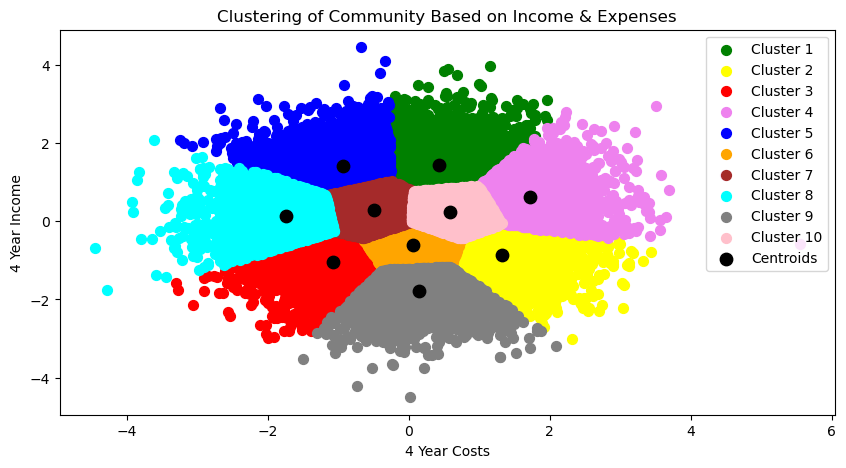

In [5]:
clusters = ['green', 'yellow', 'red', 'violet', 'blue', 'orange', 'brown', 'cyan', 'grey', 'pink']

plt.figure(figsize=(10, 5))

for i in range(10):
    plt.scatter(X_scaled[y==i, 0], X_scaled[y==i, 1], s=50, c=clusters[i], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=80, c='black', label='Centroids')

plt.title('Clustering of Community Based on Income & Expenses')
plt.xlabel('4 Year Costs')
plt.ylabel('4 Year Income')
plt.legend()
plt.show()

## Hyperparameter Tuning

In [6]:
# choosing the number of clusters using Within-Cluster Sum of Square(WCSS), and also calculating the Silhouette score

# rescaling 
X = df[['4_year_costs', '4_year_income']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []

for i in range(2,21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    print(f'for k={i}: silhouette_score is {round(score, 4)}')
    wcss.append(kmeans.inertia_)

for k=2: silhouette_score is 0.6197
for k=3: silhouette_score is 0.6136
for k=4: silhouette_score is 0.6029
for k=5: silhouette_score is 0.5431
for k=6: silhouette_score is 0.5443
for k=7: silhouette_score is 0.5202
for k=8: silhouette_score is 0.5174
for k=9: silhouette_score is 0.5231
for k=10: silhouette_score is 0.5239
for k=11: silhouette_score is 0.5046
for k=12: silhouette_score is 0.4986
for k=13: silhouette_score is 0.4901
for k=14: silhouette_score is 0.4971
for k=15: silhouette_score is 0.4943
for k=16: silhouette_score is 0.4808
for k=17: silhouette_score is 0.476
for k=18: silhouette_score is 0.4755
for k=19: silhouette_score is 0.4678
for k=20: silhouette_score is 0.474


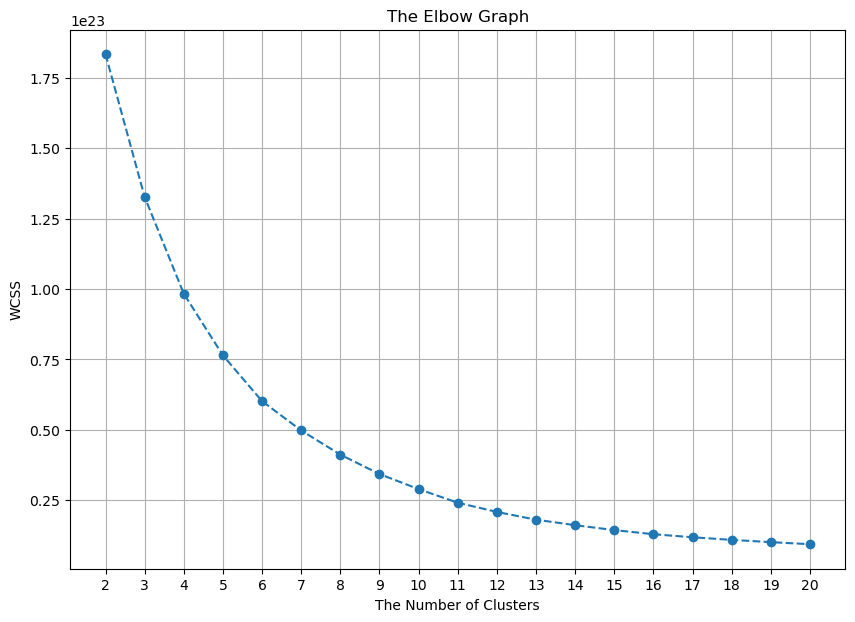

In [7]:
# plot an elbow graph
plt.figure(figsize=(10, 7))
plt.plot(range(2, 21), wcss, marker='o', linestyle='--')
plt.title('The Elbow Graph')
plt.xlabel('The Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(2, 21))
plt.grid(True)
plt.show()

In [8]:
'''
based on the elbow in the 'Elbow Graph' on 3, and the Silhouette score, 
we choose 3 as the optimized numer of clusters!
'''
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

# return a label on each data point
y = kmeans.fit_predict(X_scaled)
y

/Users/soroush/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 1, ..., 0, 0, 1], dtype=int32)

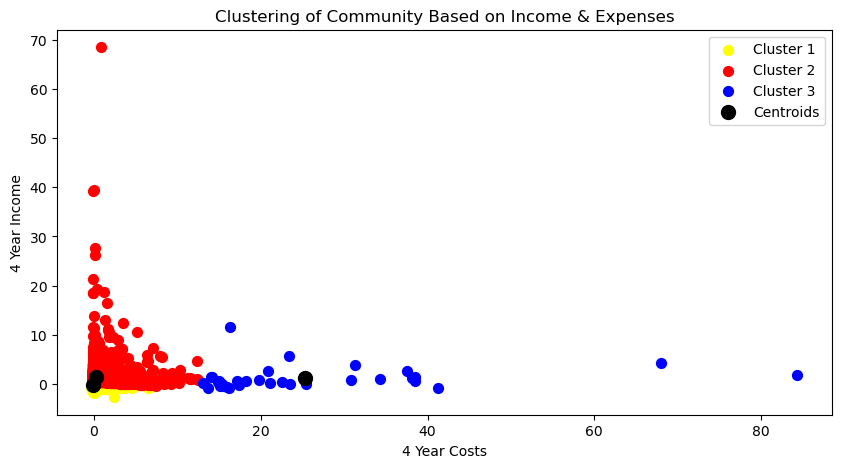

In [9]:
clusters = ['yellow', 'red', 'blue']

plt.figure(figsize=(10, 5))

for i in range(3):
    plt.scatter(X_scaled[y==i, 0], X_scaled[y==i, 1], s=50, c=clusters[i], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')

plt.title('Clustering of Community Based on Income & Expenses')
plt.xlabel('4 Year Costs')
plt.ylabel('4 Year Income')
plt.legend()
plt.show()

## DBSCAN

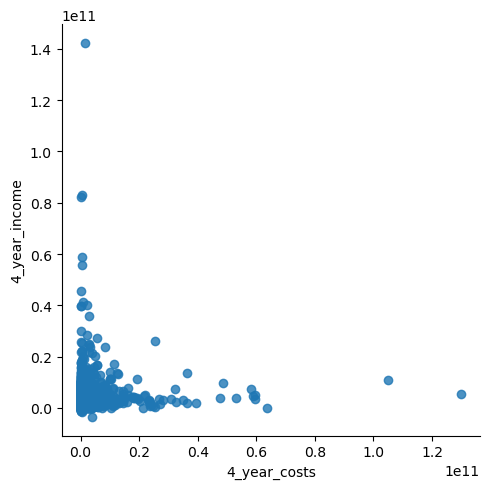

In [10]:
sns.lmplot(x='4_year_costs', y='4_year_income', fit_reg=False, data=df)

In [6]:
# fixing scatterness of the data so that the 10 clusters be visible
np.random.seed(42)  
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)

scatter_factor = 15

X_distributed = X + scatter_factor * np.random.normal(loc=0.0, scale=std_dev, size=X.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_distributed)

df2 = pd.DataFrame(X_scaled, columns=['4_year_costs_scaled', '4_year_income_scaled'])

تأثیر پارامتر eps:
افزایش eps منجر به افزایش تعداد نقاط در هر همسایگی می‌شود که می‌تواند به افزایش تعداد خوشه‌ها یا کاهش نویز منجر شود.
کاهش eps باعث تشکیل خوشه‌های کوچک‌تر و افزایش نقاط نویز می‌شود.
تأثیر پارامتر min_samples:
افزایش min_samples تعداد نقاط لازم برای تشکیل یک خوشه را افزایش می‌دهد که می‌تواند باعث کاهش تعداد خوشه‌ها و افزایش نقاط نویز شود.
کاهش min_samples می‌تواند به افزایش تعداد خوشه‌ها و کاهش نقاط نویز منجر شود.


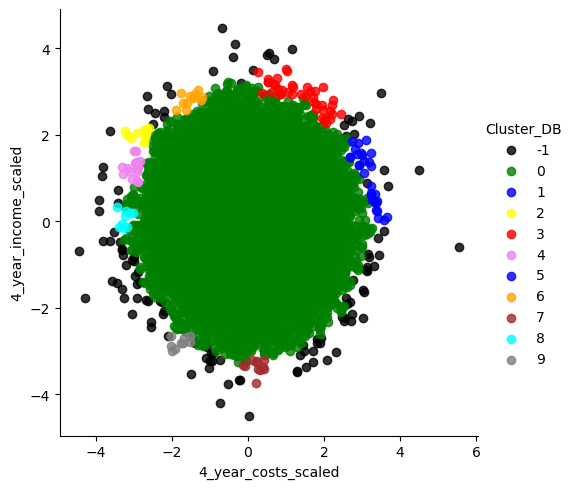

In [35]:
# creating 10 clusters

print("تأثیر پارامتر eps:")
print("افزایش eps منجر به افزایش تعداد نقاط در هر همسایگی می‌شود که می‌تواند به افزایش تعداد خوشه‌ها یا کاهش نویز منجر شود.")
print("کاهش eps باعث تشکیل خوشه‌های کوچک‌تر و افزایش نقاط نویز می‌شود.")
print("تأثیر پارامتر min_samples:")
print("افزایش min_samples تعداد نقاط لازم برای تشکیل یک خوشه را افزایش می‌دهد که می‌تواند باعث کاهش تعداد خوشه‌ها و افزایش نقاط نویز شود.")
print("کاهش min_samples می‌تواند به افزایش تعداد خوشه‌ها و کاهش نقاط نویز منجر شود.")

db = DBSCAN(eps=0.35, min_samples=9, metric='euclidean').fit(df2)
df2['Cluster_DB'] = db.labels_
sns.lmplot(x='4_year_costs_scaled', y='4_year_income_scaled', data=df2, 
           hue='Cluster_DB', fit_reg=False, palette={-1: 'black', 
                                                     0: 'green',
                                                     1:'blue', 
                                                     2:'yellow', 
                                                     3:'red', 
                                                     4:'violet', 
                                                     5:'blue', 
                                                     6:'orange', 
                                                     7:'brown', 
                                                     8:'cyan', 
                                                     9:'grey', 
                                                     })
                                                                                                                  
plt.show()